In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import colorcet as cc

from sklearn.decomposition import PCA
from norm import cut_norm,interpolate_and_sample

def readsheet(sheetname,excel_file_path):
    data = pd.read_excel(excel_file_path,sheet_name=sheetname)
    columns_to_remove = ['Temp. [°C]']
    data.drop(columns=columns_to_remove, inplace=True)
    return data


In [50]:
#SUM ALL THE DATA
excel_file_path = 'WT_in_LB_data_Omar_s1.XLSX'
lsheetnames = ['P0002','P0005','P0008','P0012','P0030']
numbers=[0,1,2,3,4]
excel_file_path2 = 'different_conditions_data_Omar_s2.XLSX'
lsheetnames2 = ['P12_WT','P13_TolC_KO','P16_AcrD_KO','P17_AcrA_KO','P18_AcrB_KO','P24_AcrBD_KO']
numbers2=[0,1,2,3,4,5]
split = [n.split('_') for n in lsheetnames2]
gene= [sublist[1] for sublist in split]         #The strain: WT,AcrA,AcrB,etc...
custom_palette=sns.color_palette(cc.glasbey) 
lsheetnames3 = ['P25_kan_2_50','P27_kan_1_25','P28_kan','P30_kan_2_50']
numbers3=[0,1,2,3]

legend_added = set()  # To keep track of colors for which legend entry is added
time_to_cut=175000
nvalues_to_interpolate=299
sum_data=pd.DataFrame()
sum_data2=pd.DataFrame()
sum_data3=pd.DataFrame()
batches=[]
batch_color_map = {}
color_index = 0
experiments=[]               

for sheetname,i in zip(lsheetnames,numbers):
    df = readsheet(sheetname, excel_file_path)
    df=cut_norm(df,time_to_cut)
    df = interpolate_and_sample(df,time_to_cut,nvalues_to_interpolate)
    # print(df.shape)
    for column,j in zip(df.columns.values[2:],enumerate(df.columns.values[2:])):
        new_column_name = f'WT_LB_{i}_{j[0]}'
        sum_data[new_column_name]=df[column]
        batch=f'WT_LB_{i}'
        batches.append(batch)
        for batch_ in batches:
            if batch_ not in batch_color_map:
                batch_color_map[batch_] = custom_palette[color_index]
                color_index = (color_index + 1) % len(custom_palette)
        color = batch_color_map[batch]
        # Add legend entry only if the color is not yet added to the legend
        if color not in legend_added:
            legend_added.add(color)  
            experiments.append(batch)


for sheetname2,i in zip(lsheetnames2,numbers2):
    df = readsheet(sheetname2,excel_file_path2)
    df=cut_norm(df,time_to_cut)
    df = interpolate_and_sample(df,time_to_cut,nvalues_to_interpolate)
    split_column_names = [name.split('_') for name in df.columns.values[2:]]
    drugs=[sublist[0] for sublist in split_column_names]
    plate_indexes=[sublist[1] for sublist in split_column_names]
    sum_split=[name.split('_') for name in sum_data.columns]
    joined_sum_split = ['_'.join(parts[:3]) for parts in sum_split]
    for column,drug,plate_index in zip(df.columns.values[2:],drugs,plate_indexes):
        aux=0
        for j in range (len(joined_sum_split)):
            if joined_sum_split[j]==f'{gene[i]}_{drug}_{aux}':
                aux+=1    
        new_column_name = f'{gene[i]}_{drug}_{aux}_{plate_index}'
        sum_data2[new_column_name]=df[column]
        batch=f'{gene[i]}_{drug}_{aux}'
        batches.append(batch)
        for batch_ in batches:
            if batch_ not in batch_color_map:
                batch_color_map[batch_] = custom_palette[color_index]
                color_index = (color_index + 1) % len(custom_palette)
        color = batch_color_map[batch]
        if color not in legend_added:
            legend_added.add(color)  
            experiments.append(batch)

for sheetname3 in lsheetnames3:
    df = readsheet(sheetname3,excel_file_path2)
    df=cut_norm(df,time_to_cut)
    df = interpolate_and_sample(df,time_to_cut,nvalues_to_interpolate)
    split_column_names = [name.split('_') for name in df.columns.values[2:]]
    strain_drugs=['_'.join(parts[:2]) for parts in split_column_names]
    plate_indexes=[sublist[2] for sublist in split_column_names]
    sum_split=[name.split('_') for name in sum_data.columns]
    joined_sum_split = ['_'.join(parts[:3]) for parts in sum_split]
    sum_split2=[name.split('_') for name in sum_data2.columns]
    joined_sum_split2 = ['_'.join(parts2[:3]) for parts2 in sum_split2]
    sum_split3=[name.split('_') for name in sum_data3.columns]
    joined_sum_split3 = ['_'.join(parts[:3]) for parts in sum_split3]
    for column,strain_drug,plate_index in zip(df.columns.values[2:],strain_drugs,plate_indexes):
        aux=0
        for j in range (len(joined_sum_split)):
            if joined_sum_split[j]==f'{strain_drug}_{aux}':
                aux+=1   
        for k in range (len(joined_sum_split2)):
            if joined_sum_split2[k]==f'{strain_drug}_{aux}':
                aux+=1 
        for l in range (len(joined_sum_split3)):
            if joined_sum_split3[l]==f'{strain_drug}_{aux}':
                aux+=1       
        new_column_name = f'{strain_drug}_{aux}_{plate_index}'
        sum_data3[new_column_name]=df[column]
        batch=f'{strain_drug}_{aux}'
        batches.append(batch)
        for batch in batches:
            if batch not in batch_color_map:
                batch_color_map[batch] = custom_palette[color_index]
                color_index = (color_index + 1) % len(custom_palette)
        color = batch_color_map[batch]
        if color not in legend_added:
            legend_added.add(color)  
            experiments.append(batch)

total_data = pd.concat([sum_data, sum_data2,sum_data3], axis=1)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7736\648309148.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sum_data2[new_column_name]=df[column]
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7736\648309148.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sum_data2[new_column_name]=df[column]
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7736\648309148.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

In [33]:
#Reorder the data by drugs/strains
train_data=pd.DataFrame()
test_data=pd.DataFrame()
batches_test=[]
batches_train=[]
np.random.seed(11)

columns=total_data.columns[:]
num_list = list(range(len(batches)))

experiments2=[]
split_experiments=[name.split('_') for name in experiments]
#experiment_types=[sublist[0] for sublist in split_experiments] 
experiment_types=[sublist[1] for sublist in split_experiments]
batches2=[]
parts=[name.split('_') for name in batches]
batches2=[sublist[1] for sublist in parts]      #[1] for drugs, [0] for strain
print(len(batches2))

for experiment_type in experiment_types:
    if experiment_type not in experiments2:
        experiments2.append(experiment_type)

print(len(experiments2),experiments2)

#Select the test_data and the train_data, 15% splitting
for experiment in experiments2:
    columns_to_select=[]
    for batch,i in zip(batches2,num_list):
        if batch==experiment:
            columns_to_select.append(columns[i])   
    test_columns = np.random.choice(columns_to_select, 1,replace=False)
    batches_test.append(experiment)
    test_columns_data = total_data[test_columns]
    print(len(test_columns),len(columns_to_select))
    test_data = pd.concat([test_data, test_columns_data], axis=1)

print(test_data.shape,train_data.shape)
print('The number of total growth curves is:',len(batches_test),len(batches_train))         


816
16 ['LB', 'K1.25', 'K2.50', 'K3.75', 'M0.25', 'M0.50', 'M1.00', 'K1.25&M0.25', 'K1.25&M0.50', 'K1.25&M1.00', 'K2.50&M0.25', 'K2.50&M0.50', 'K2.50&M1.00', 'K3.75&M0.25', 'K3.75&M0.50', 'K3.75&M1.00']
1 195
1 98
1 149
1 44
1 32
1 32
1 32
1 26
1 26
1 26
1 26
1 26
1 26
1 26
1 26
1 26
(258, 16) (0, 0)
The number of total growth curves is: 16 0


In [48]:
np.random.seed(11)
figure4_df1=pd.DataFrame()

for i in range(3):
    columns_to_select=[]
    aux=np.random.choice(num_list, 1,replace=False)
    aux=aux[0]
    columns_to_select.append(columns[aux])
    figure4_df1[columns_to_select]=total_data[columns_to_select]

df = readsheet('P0002', 'WT_in_LB_data_Omar_s1.XLSX')
df=cut_norm(df,time_to_cut)
Time=df['Time [s]'].values
figure4_df1['Time [s]'] = Time


In [45]:
np.random.seed(11)
figure4_df2=pd.DataFrame()

for i in range(3):
    columns_to_select=[]
    aux=np.random.choice(num_list, 1,replace=False)
    aux=aux[0]
    columns_to_select.append(columns[aux])
    figure4_df2[columns_to_select]=total_data[columns_to_select]

df = readsheet('P0002', 'WT_in_LB_data_Omar_s1.XLSX')
df=cut_norm(df,time_to_cut)
df = interpolate_and_sample(df,time_to_cut,nvalues_to_interpolate)
Time=df['Time [s]'].values
figure4_df2['Time [s]'] = Time

['TolC_LB_2_3']
['AcrBD_K3.75_0_1']
['AcrD_M0.25_0_3']
(100, 3)


Index(['TolC_LB_2_3', 'AcrBD_K3.75_0_1', 'AcrD_M0.25_0_3', 'Time [s]'], dtype='object') Index(['TolC_LB_2_3', 'AcrBD_K3.75_0_1', 'AcrD_M0.25_0_3', 'Time [s]'], dtype='object')


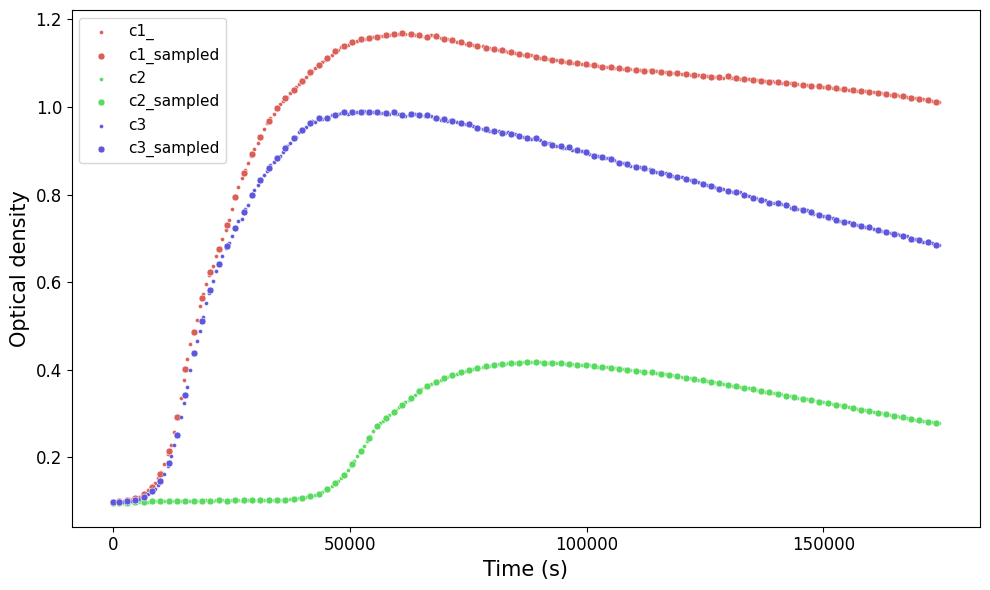

In [79]:
print(figure4_df1.columns,figure4_df2.columns)
curves1=['c1_','c2','c3']
curves2=['c1_sampled','c2_sampled','c3_sampled']
fig, ax = plt.subplots(1,1,figsize=[10,6])
palette=sns.color_palette('hls',3) 

for column1,column2,curve1,curve2,color in zip(figure4_df1.columns.values[:3],figure4_df1.columns.values[:3],curves1,curves2,palette):
    sns.scatterplot(data=figure4_df1, x=figure4_df1['Time [s]'], y=column1,ax=ax,color=color,label=curve1,s=8)
    sns.scatterplot(data=figure4_df2, x=figure4_df2['Time [s]'], y=column2,ax=ax,color=color,label=curve2,s=25)

plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Optical density',fontsize=15)
ax.set_xticks(range(0, 175000, 50000))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(prop={'size': 11})
#ax.legend()
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

(100, 17)


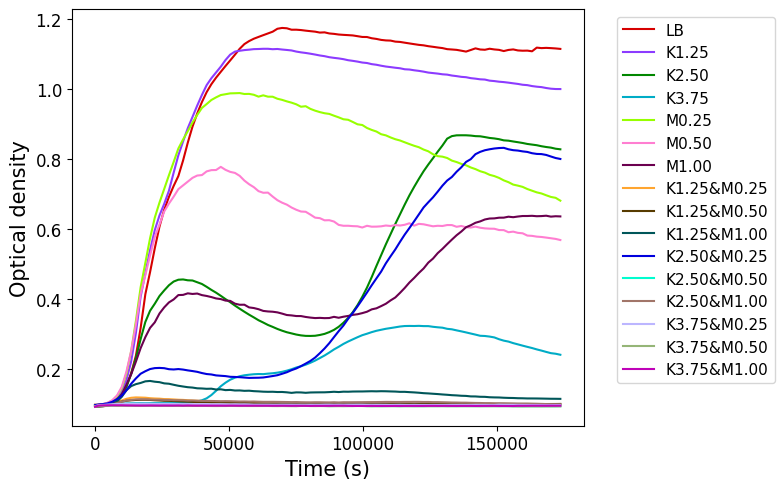

In [4]:
fig, ax = plt.subplots(1,1,figsize=[8,5])
custom_palette=sns.color_palette(cc.glasbey,len(experiments2)) 
df = readsheet('P0002', 'WT_in_LB_data_Omar_s1.XLSX')
df=cut_norm(df,time_to_cut)
df = interpolate_and_sample(df,time_to_cut,nvalues_to_interpolate)
print(df.shape)
Time=df['Time [s]'].values
test_data['Time [s]'] = Time
legend_added = set()  
batch_color_map = {}
color_index = 0
for batch in batches2:
    if batch not in batch_color_map:
        batch_color_map[batch] = custom_palette[color_index]
        color_index = (color_index + 1) % len(custom_palette)

for column,batch in zip(test_data.columns.values[:len(batches_test)],batches_test):
    color = batch_color_map[batch]
    if color not in legend_added:
        sns.lineplot(data=test_data, x=test_data['Time [s]'], y=column,ax=ax,color=color,label=batch)
        legend_added.add(color)  # Add the color to the set to indicate the legend entry is added
    else:
        sns.lineplot(data=test_data, x=test_data['Time [s]'], y=column,ax=ax,color=color)

plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Optical density',fontsize=15)
ax.set_xticks(range(0, 175000, 50000))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 11})
#ax.legend()
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

[1.36844190e+01 5.43591833e-01 2.08461224e-01 3.51573683e-02
 9.04586262e-03]
[9.44418741e+01 3.75155360e+00 1.43867772e+00 2.42635639e-01
 6.24292649e-02]
(816, 5) (816, 100)


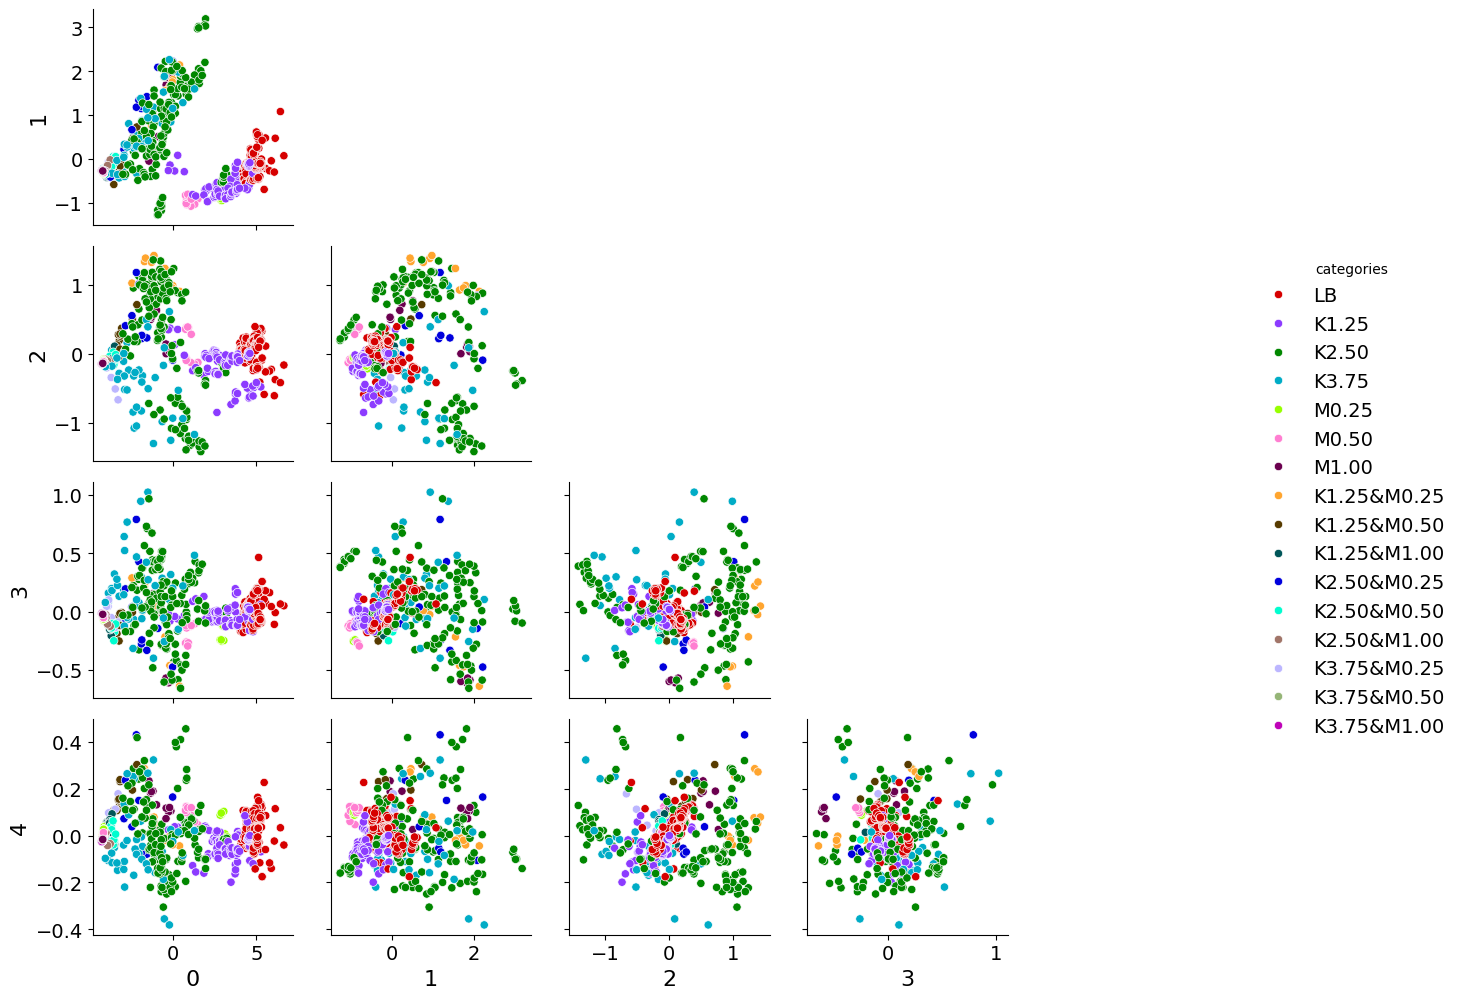

In [11]:
#Transpose the pd dataframe in order to introduce the data in the PCA

df_transposed=total_data.T

n_samples=df_transposed.shape[0]      #Number of vectors(growth curves)
n_features=df_transposed.shape[1]     #Dimension of the vectors  
numpy_array=df_transposed.values

#Do the Principal Component Analysis

#print(numpy_array.shape)
pca=PCA(n_components=5)
X_new=pca.fit_transform(numpy_array)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_*100)
#print(X_new)
X_new_df = pd.DataFrame(X_new)
print(X_new_df.shape,df_transposed.shape)
X_new_df['categories'] = batches2
drug='K3.75&M1.00'
index_drug=experiments2.index(drug)
filtered_df = X_new_df[X_new_df['categories'] == drug]
palette=sns.color_palette(cc.glasbey,len(experiments2))
palette=[palette[index_drug]]
#g = sns.PairGrid(filtered_df, hue='categories',palette=palette)
g = sns.PairGrid(X_new_df,hue='categories',palette=sns.color_palette(cc.glasbey,len(experiments2)) )
g.map_lower(sns.scatterplot)
# Hide the diagonal and upper triangle plots
for i, j in zip(*np.triu_indices_from(g.axes, 0)):
    g.axes[i, j].set_visible(False)

# Adjust tick label sizes and axis label sizes
for ax in g.axes.flatten():
    if ax is not None:
        ax.tick_params(axis='both', which='major', labelsize=14)  # Adjust the tick label size
        ax.set_xlabel(ax.get_xlabel(), fontsize=16)  # Adjust the x-axis label size
        ax.set_ylabel(ax.get_ylabel(), fontsize=16)  # Adjust the y-axis label size

# Add legend
g.add_legend(fontsize=14)
# Show the plot
plt.show()


         pca
0  94.441874
1   3.751554
2   1.438678
3   0.242636
4   0.062429


<Axes: xlabel='Principal components', ylabel='Percentage of explained variance ratio'>

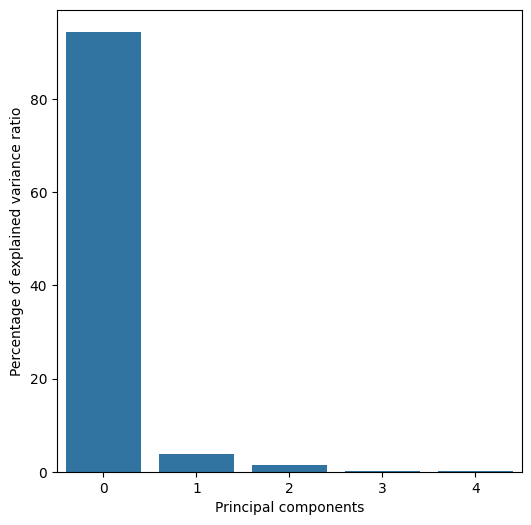

In [7]:
fig, ax = plt.subplots(1,1,figsize=[6,6])

principal_components=pd.DataFrame()
principal_components['pca']=pca.explained_variance_ratio_*100
print(principal_components)

plt.xlabel('Principal components')
plt.ylabel('Percentage of explained variance ratio')
sns.barplot(data=principal_components,x=[0,1,2,3,4], y="pca")


In [7]:
matrix=pca.components_.T*np.sqrt(pca.explained_variance_)
matrix=matrix.T

print('The loadings are the covariances/correlations between the original variables and the unit-scaled components')
print('In this case they are', matrix.shape[0], 'vectors of dimension',matrix.shape[1])

The loadings are the covariances/correlations between the original variables and the unit-scaled components
In this case they are 5 vectors of dimension 100
